# Correlations between datasets

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

panelist_data_df = dataframe with panelist data using values from 1. panelist

In [168]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

show distribution of each flavor in the panelist data

In [170]:
flavors = ['floral','fruit','wood','complexity','malt','sweet','peat','dried_fruits','aftertaste']

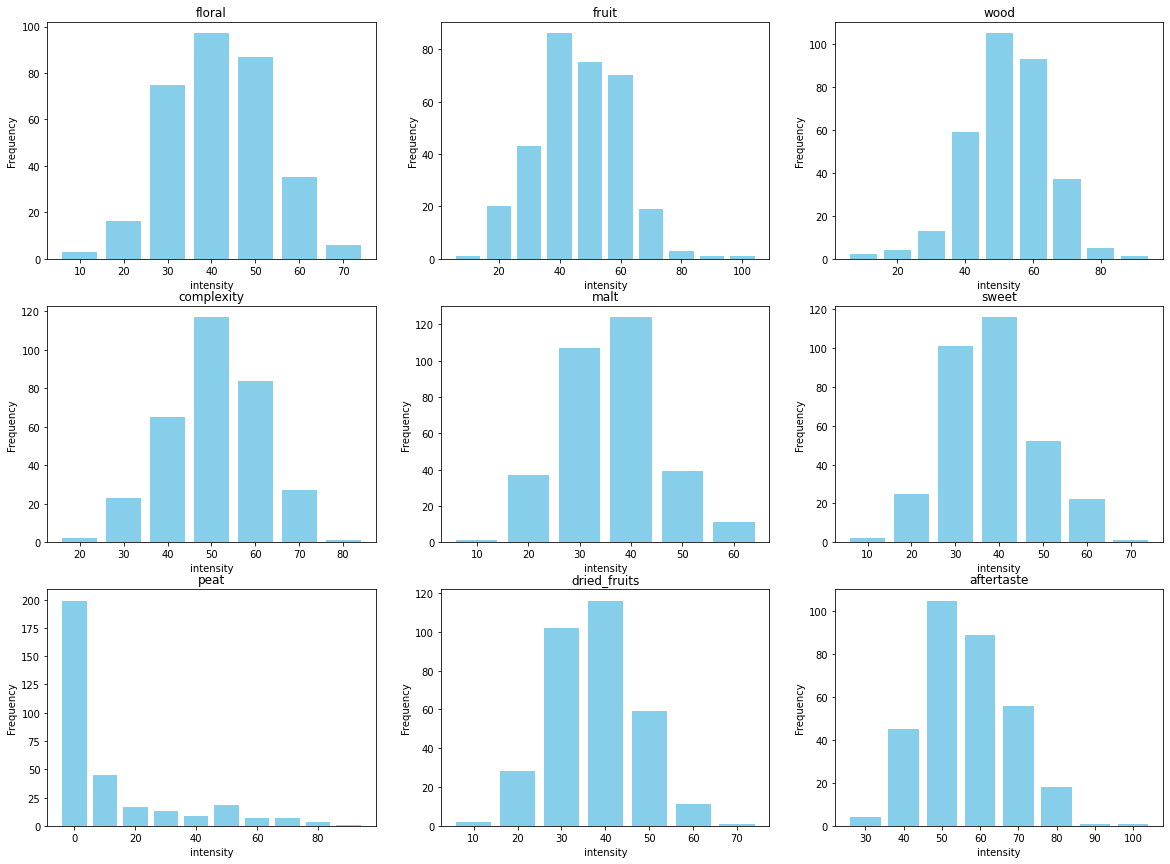

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_df[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


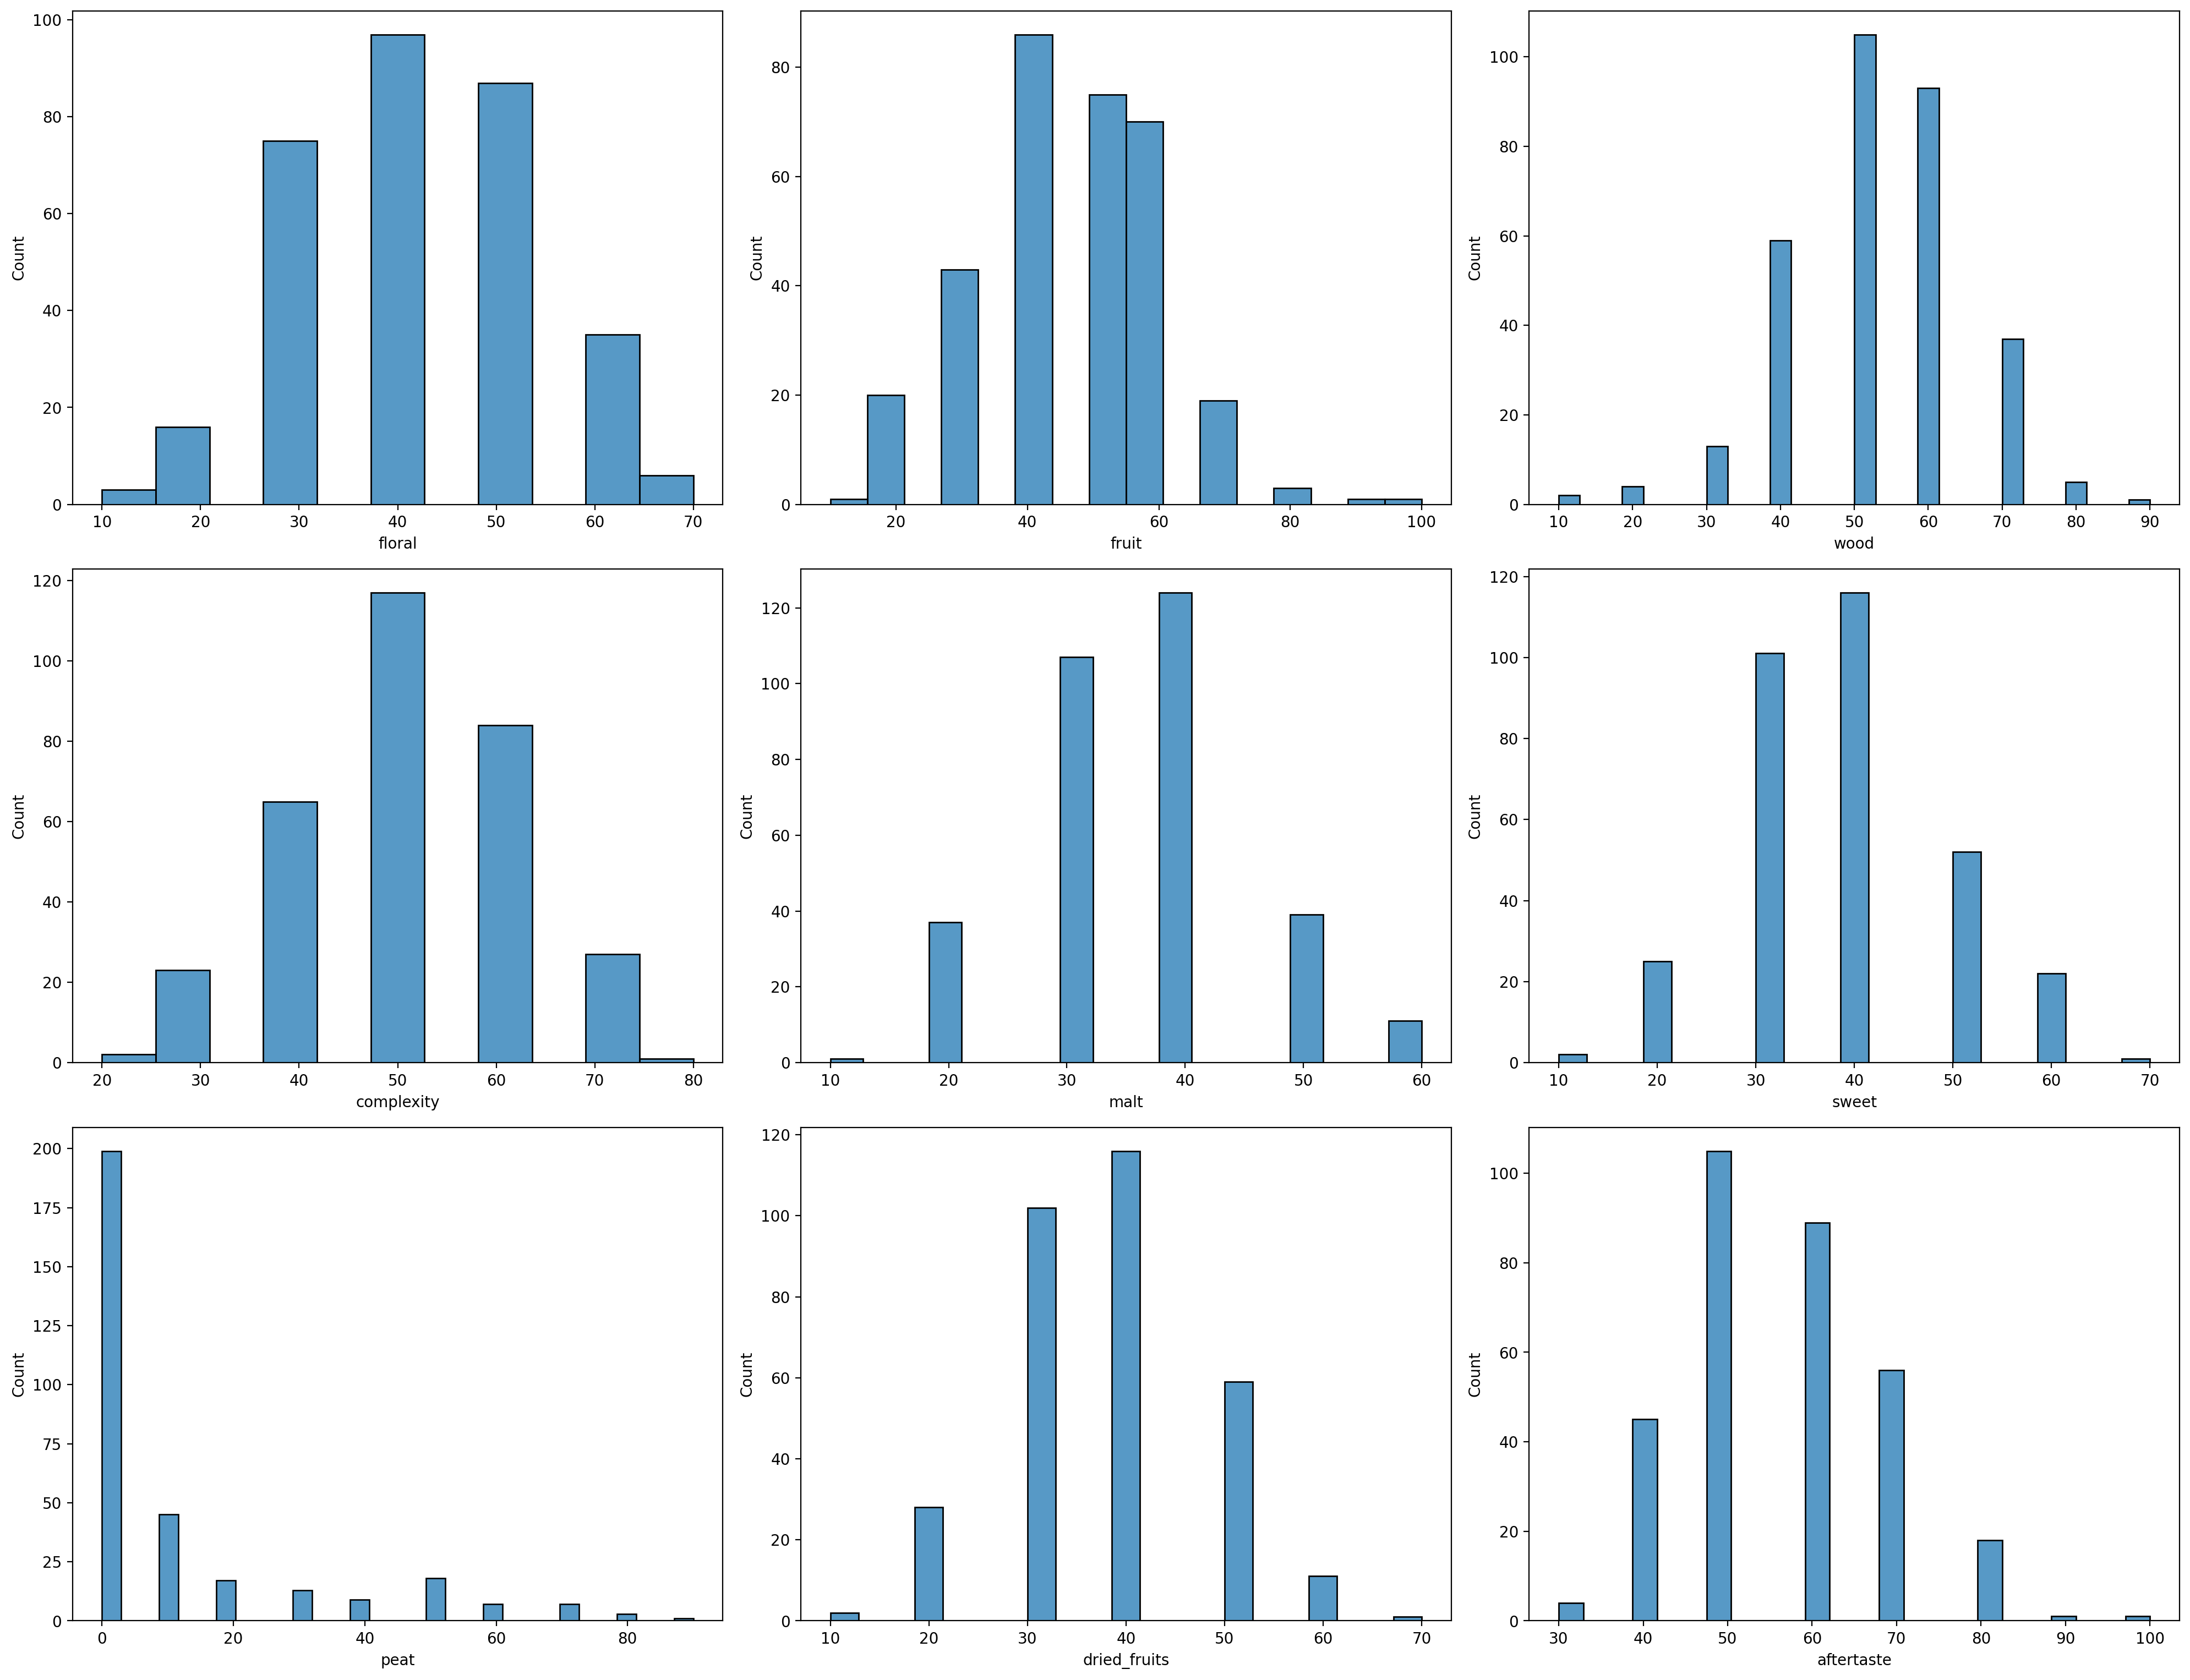

In [32]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


### 1. Looking at one Flavor only

#### filter only sweet samples

In [179]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliat
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])

ms_data_comp = df of ms data containing only comparable samples


panelist_data_comp = df of panelist data containing only comparable samples

In [172]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [180]:
# look which smaples are sweet, average sweet and not sweet
sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]>= 60].index
not_sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]<= 20].index
average_sweet_sample_ids = panelist_data_comp[(panelist_data_comp["sweet"] >= 30) & (panelist_data_comp["sweet"] <= 50)]["sweet"].index

In [181]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

In [182]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]

In [183]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
sweet_descriptors_CAS

['100-51-6',
 '101-97-3',
 '10486-19-8',
 '106-25-2',
 '106-70-7',
 '1118-27-0',
 '112-44-7',
 '1139-30-6',
 '115-95-7',
 '116-26-7',
 '1209-71-8',
 '122-78-1',
 '123-11-5',
 '123123-38-6',
 '13360-64-0',
 '141-16-2',
 '141-79-7',
 '143-13-5',
 '15051-81-7',
 '15352-77-9',
 '18679-18-0',
 '18794-84-8',
 '20407-84-5',
 '07.05.2305',
 '23267-57-4',
 '2463-77-6',
 '25779-13-9',
 '27538-09-6',
 '3033-23-6',
 '3779-61-1',
 '4077-47-8',
 '470-82-6',
 '4748-78-1',
 '4861-58-9',
 '502-61-4',
 '505-10-2',
 '531-59-9',
 '53398-85-9',
 '551-93-9',
 '552-02-3',
 '58615-39-7',
 '60066-88-8',
 '617-05-0',
 '623-42-7',
 '637-69-4',
 '64-17-5',
 '6627-88-9',
 '695-06-7',
 '713-95-1',
 '73744-93-1',
 '03.12.7554',
 '78-36-4',
 '90-05-1',
 '91-64-5',
 '93-58-3',
 '939-48-0',
 '94-59-7',
 '95-93-2',
 '96-48-0',
 '97-62-1',
 '98-01-1']

In [184]:
# create dataframe for plotting 
violin_df = pd.DataFrame.copy(ms_data_comp)
violin_df["category"]= list((pd.Series(violin_df.index)).apply((lambda x: 'sweet' if x in sweet_sample_ids else ('not sweet' if x in not_sweet_sample_ids else 'average'))))

violin_df = containing all CAS numbers and comparable samples plus their category meaning if the sample was categorized sweet, not sweet or average sweet regarding the panelist data

In [185]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.241942e+08,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.101815e+08,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.078365e+08,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.052143e+08,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.322088e+08,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.562665e+08,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average


### 1. over all samples

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler


In [43]:
def normalize_flavorprofile(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))
    return scaled_data

In [186]:
violin_df['category_int'] = pd.DataFrame.copy(violin_df['category'])
violin_df['category_int'] = violin_df['category_int'].replace({'sweet': 1, 'average': 0, 'not sweet': -1})
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category,category_int
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average,0
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average,0
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average,0
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average,0
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average,0
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average,0
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average,0


In [187]:
flavor_true = violin_df[violin_df["category_int"] == 1].index
flavor_false = violin_df[violin_df["category_int"] == -1].index
flavor_true_mean = np.mean(violin_df['6485-40-1'].loc[flavor_true])
flavor_true_false = np.mean(violin_df['6485-40-1'].loc[flavor_false])


In [188]:
print(flavor_true_mean)
print(flavor_true_false)
print(flavor_true_mean/flavor_true_false)

252637853.08052745
246353300.18951476
1.0255103255616147


check correlation

samples which are categorised in sweet should be highly expressed in this cas number if the cas number is labeled as sweet

function which checks if intensity over all sweet samples should be higher than intensity over not sweet or average samples 

In [84]:
'''
if the difference is > 0 than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    #check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_int"] == 1].index
    flavor_false = df[df["category_int"] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    difference=mean_flavor_true/mean_flavor_false
    return difference

In [189]:
check_CAS(violin_df,'100-51-6','sweet')

1.507998821788822

In [190]:
# Assuming df is your DataFrame
numeric_columns = violin_df.select_dtypes(include=[np.number])
df_log1p_numeric = np.log1p(numeric_columns)

# Concatenate the log-transformed numeric columns with the non-numeric columns
df_log1p = pd.concat([violin_df.select_dtypes(exclude=[np.number]), df_log1p_numeric], axis=1)

In [191]:
df_log1p['category_int']=violin_df['category_int']

In [192]:
check_CAS(df_log1p,'100-51-6','sweet')

1.0139730040123356

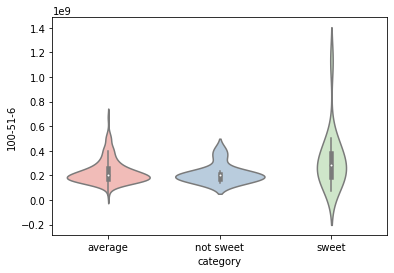

In [193]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category',y= '100-51-6', data=violin_df, palette="Pastel1")
plt.show()

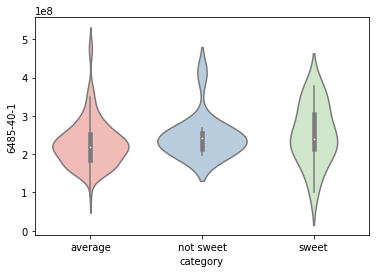

In [49]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category',y= '6485-40-1' , data=violin_df, palette="Pastel1")
plt.show()

Looking at all samples considering only sweet CAS numbers

In [56]:
# filter for CAS numbers labeled sweet
sweet_cas_violin_df = pd.DataFrame.copy(violin_df[sweet_descriptors_CAS] )
sweet_cas_violin_df['category'] = pd.DataFrame.copy(violin_df['category'])
#sweet_cas_violin_df = contains all sample and only those CAS numbers which are labeled as sweet
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,4.762459e+08,6.655814e+08,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,0.0,5.292697e+07,0.0,average
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,4.380083e+08,3.465025e+08,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,0.0,4.794602e+07,0.0,average
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,4.977290e+08,4.154797e+08,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,0.0,7.741295e+07,0.0,average
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,1.598261e+08,4.865091e+08,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,0.0,9.969508e+07,0.0,average
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.044317e+08,4.234640e+08,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,0.0,3.456049e+07,0.0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,3.128464e+08,3.459892e+08,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,0.0,5.133717e+07,0.0,average
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,3.920165e+08,3.089746e+08,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,0.0,5.413424e+07,0.0,average
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,3.212696e+08,3.116514e+08,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,0.0,5.009739e+07,0.0,average


In [58]:
sweet_cas_violin_df["sum"]= sweet_cas_violin_df.apply(lambda row:row[0:-1].sum(), axis=1)

In [62]:
sweet_cas_violin_df["mean"]= sweet_cas_violin_df.apply(lambda row:row[0:-2].mean(), axis=1)

In [63]:
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category,sum,mean
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,0.0,5.292697e+07,0.0,average,2.185828e+10,3.583325e+08
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,0.0,4.794602e+07,0.0,average,2.155074e+10,3.532909e+08
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,0.0,7.741295e+07,0.0,average,2.663776e+10,4.366846e+08
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,0.0,9.969508e+07,0.0,average,2.285271e+10,3.746347e+08
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,0.0,3.456049e+07,0.0,average,1.667396e+10,2.733436e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,0.0,5.133717e+07,0.0,average,1.508288e+10,2.472603e+08
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,0.0,5.413424e+07,0.0,average,1.655488e+10,2.713914e+08
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,0.0,5.009739e+07,0.0,average,1.690066e+10,2.770600e+08


<AxesSubplot:xlabel='category', ylabel='sum'>

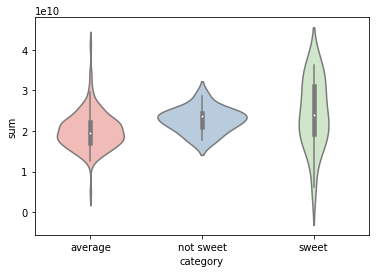

In [194]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category', y='sum', data=sweet_cas_violin_df, palette="Pastel1")


<AxesSubplot:xlabel='category', ylabel='mean'>

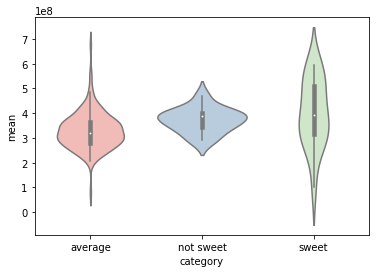

In [65]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category', y='mean', data=sweet_cas_violin_df, palette="Pastel1")


#### T - Test
checking difference of intensity for one CAS between different samples

In [126]:
from scipy import stats  

In [ ]:
flavor_true = violin_df[violin_df["category_int"] == 1].index
flavor_false = violin_df[violin_df["category_int"] == -1].index

In [119]:
t_stat, p_val = stats.ttest_ind(violin_df['100-51-6'].loc[flavor_true], violin_df['100-51-6'].loc[flavor_false])  


In [122]:
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 1.5872619841433904
p-value = 0.12368333223729602


In [123]:
check_CAS(violin_df,'100-51-6','sweet')

1.507998821788822

In [132]:
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,97-62-1,category,sum,mean
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,4.762459e+08,6.655814e+08,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,5.292697e+07,average,2.185828e+10,3.583325e+08
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,4.380083e+08,3.465025e+08,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,4.794602e+07,average,2.155074e+10,3.532909e+08
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,4.977290e+08,4.154797e+08,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,7.741295e+07,average,2.663776e+10,4.366846e+08
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,1.598261e+08,4.865091e+08,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,9.969508e+07,average,2.285271e+10,3.746347e+08
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.044317e+08,4.234640e+08,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,3.456049e+07,average,1.667396e+10,2.733436e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,3.128464e+08,3.459892e+08,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,5.133717e+07,average,1.508288e+10,2.472603e+08
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,3.920165e+08,3.089746e+08,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,5.413424e+07,average,1.655488e+10,2.713914e+08
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,3.212696e+08,3.116514e+08,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,5.009739e+07,average,1.690066e+10,2.770600e+08


In [131]:
# remove rows with only 0 
sweet_cas_violin_df = sweet_cas_violin_df.loc[:, (sweet_cas_violin_df != 0).any(axis=0)]

## Pipeline Flavor Profile

In [ ]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import csv
import numpy as np


In [ ]:
'''
does convert a pandas dataframe into a matrix where 
keys = row name
values = col name
data = either 0 or 1 
'''
def dict_to_matrix(dictionary):
    unique_values = set(val for sublist in dictionary.values() for val in sublist)
    data_dict = {key: {val: 1 if val in values else 0 for val in unique_values} for key, values in dictionary.items()}
    df = pd.DataFrame(data_dict).T
    return(df)


In [ ]:
'''
find overlapp between to lists with a threshold (=70)
'''
def overlapping_elements(list1, list2, threshold=70):
    overlap = []
    for elem1 in list1:
        for elem2 in list2:
            ratio = fuzz.ratio(elem1, elem2)
            if ratio >= threshold:
                overlap.append(elem1)
    return overlap

In [ ]:
'''
Convert DataFrame to dictionary
'''
def dataframe_to_dict(df):
    result_dict = {}
    for index, row in df.iterrows():
        if row[0] in result_dict:
            result_dict[row[0]].append(row[1])
        else:
            result_dict[row[0]] = [row[1]]
    return result_dict     

In [ ]:
'''
find match between dictionary entries and the rows of a dataframe
'''
def find_matching_entries(dictionary,df):
    threshold = 80
    found_match = []
    found_match_per_entry = {}
    for key, value in dictionary.items():
        all_matches = set()
        for index, row in df.iterrows():
            for keyword in value:
                if fuzz.ratio(keyword, str(index).lower()) >= threshold:
                    all_matches.add(index)
                    found_match.append(row)
        found_match_per_entry[key] = all_matches
    found_match = pd.DataFrame(found_match)
    found_match = found_match.drop_duplicates()
    return(found_match, found_match_per_entry)

In [ ]:
'''
create a new matrix by finding matches and filtering right columns
'''
def create_matrix_from_dict(dictionary,df, index):
    matrix = pd.DataFrame(columns=list(df), index=index)
    final_dict = {}
    for key, value in dictionary.items():
        current_val = []
        for v in value:
            for index, row in df.iterrows():
                if index == v:
                    current_val.append(','.join(row.loc[row.eq(1)].index.tolist()))
                    # todo: maybe exception -> do change if two ones in a row
                    matrix.loc[key][row.loc[row.eq(1)].index.tolist()] = 1
        final_dict[key] = set(current_val)
    matrix = matrix.fillna(0)
    matrix = matrix.loc[:, (matrix != 0).any(axis=0)]
    return(final_dict, matrix)
   

#### 1. MS Data ----- Massbank -----> Molecules

-> Chris

save which intensities belong to which molecule and give each the % 
2 approaches for one molecule with multiple OQs
1.  each gets same % 
2.  divide % by count of OQs per molecule

<span style="color:lightblue">mol_int</span> : dict where key is the molecule name and value is the intensites from the mass spec data

In [ ]:
# DUMMY DATA
intensities = [80, 40, 5]
ms_cas =['(E)-3-hexenol', "coumarin",'citral']
mol_int = {'(E)-3-hexenol': 80, "coumarin": 40 ,'citral': 5}

In [ ]:
# actual ms data
file_path = 'data/cas_intensities.csv'
data = pd.read_csv(file_path, delimiter=',')
# only use first repliate
data = data[data["replicate"]==1]

In [ ]:
sample_key = "000920"

In [ ]:
used_data = data[data["sample_key"]==sample_key]
#filter columns that are 0
used_data = used_data.loc[:, (used_data != 0).any(axis=0)]
used_data

,sample_key,replicate,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
0,000920,1,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,...,2.528854e+08,1.831223e+08,1.048295e+08,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08


In [ ]:
'''# find rows with biggest variances
df = used_data
row_combinations = list(itertools.combinations(df.index, 2))
distances = [abs(df.loc[i[0]] - df.loc[i[1]]).sum() for i in row_combinations]
max_distance_indices = row_combinations[distances.index(max(distances))]
print(df.loc[max_distance_indices[0]])
print(df.loc[max_distance_indices[1]])
#=> sample: 000879 and 000373'''

'# find rows with biggest variances\ndf = used_data\nrow_combinations = list(itertools.combinations(df.index, 2))\ndistances = [abs(df.loc[i[0]] - df.loc[i[1]]).sum() for i in row_combinations]\nmax_distance_indices = row_combinations[distances.index(max(distances))]\nprint(df.loc[max_distance_indices[0]])\nprint(df.loc[max_distance_indices[1]])\n#=> sample: 000879 and 000373'

In [ ]:
used_data = used_data.drop(columns=['sample_key', 'replicate'])
largest_entries = used_data.iloc[0].nlargest(n)
#largest_entries = np.log1p(used_data.iloc[0].nlargest(n))

# Create a new DataFrame with only the largest entries
data_top50 = pd.DataFrame({'Intensities': largest_entries})
data_top50

,Intensities
3033-23-6,1.240854e+09
876-17-5,1.240854e+09
07.11.5258,1.240854e+09
21662-09-9,1.240854e+09
491-04-3,1.240854e+09
...,...
68039-26-9,2.996598e+08
112-42-5,2.996598e+08
39638-67-0,2.984695e+08
80041-01-6,2.984695e+08


In [ ]:
ms_cas = list(data_top50.index)

In [ ]:
intensities = list(data_top50['Intensities'])

<span style="color:#FBB714">I_vector</span> : dataframe with *molecules x intensities*

In [ ]:
#I_vector = pd.DataFrame(data = mol_int, index = ["intensities"]).T
I_vector = pd.DataFrame(data= intensities,index = ms_cas, columns=["intensities"])
I_vector

,intensities
3033-23-6,1.240854e+09
876-17-5,1.240854e+09
07.11.5258,1.240854e+09
21662-09-9,1.240854e+09
491-04-3,1.240854e+09
...,...
68039-26-9,2.996598e+08
112-42-5,2.996598e+08
39638-67-0,2.984695e+08
80041-01-6,2.984695e+08


#### 2. Molecules ----- Flavornet -----> OD 
Find ODs by matching molecules with databases using Flavornet

<span style="color:lightblue">CAS_to_odorants.csv</span> : table with following columns - molecule, CAS, Mol wt, odorant


##### table manipualtion done in R

```r
library(rlang)
library(tidyverse)

CAS_to_odorants <- read.table("~/Bioinformatik_20.21/Bachelorarbeit/CAS_to_mol.txt", sep = "\t", header = FALSE)
OD_to_mol <- read.table("~/Bioinformatik_20.21/Bachelorarbeit/OD_mol.txt", sep = "\t", header = FALSE)

OD_to_mol_sep <- OD_to_mol %>%
  separate_rows(V2, sep = ";\\s*") %>%
  mutate(V2 = trimws(V2))
OD_to_mol_final <- OD_to_mol_sep[, c("V2","V1")]
colnames(OD_to_mol_final) <- c("molecule", "OD")

CAS_to_odorants_sep <- CAS_to_odorants %>%
  separate_rows(V3, sep = ";\\s*") %>%
  mutate(V3 = trimws(V3))
colnames(CAS_to_odorants_sep) <- c("CAS","Mol Wt", "molecule")


merged_df <- merge(CAS_to_odorants_sep, OD_to_mol_final, by = "molecule")
write.csv(merged_df, file = "~/Bioinformatik_20.21/Bachelorarbeit/CAS_mol_OD.csv", row.names = FALSE)
```

*Flavornet only*

<span style="color:lightblue">mol_to_OD</span> : dict where key is the molecule and the descriptors for these molecules are the values

In [ ]:
'''
read flavornet data and save it in mol_to_OD
'''
# only using flavornet data
mol_to_OD = {}
descriptors = []
CAS_numbers= []
with open('./data/CAS_mol_OD.csv', 'r',encoding='utf-8') as tabfile:
    reader = csv.reader(tabfile, delimiter=',')
    for row in reader: 
        CAS = row[1]
        OD = row[3]
        CAS_numbers.append(CAS)
        descriptors.append(OD)
        if CAS in mol_to_OD:
            mol_to_OD[CAS].add(OD)
        else:
            mol_to_OD[CAS]  = set([OD])


CAS_numbers = list(set(CAS_numbers))
# list of all individual descriptors/ODs
descriptors = list(set(descriptors))

<span style="color:#FBB714">D</span>: Dataframe with all *molecules x ODs* - rigth now only flavornet database

In [ ]:
D = pd.DataFrame(index=CAS_numbers, columns=descriptors)

In [ ]:
len(CAS_numbers)

732

In [ ]:
for col in D.columns:
    for index, row in D.iterrows():
        # Check if value in  current row matches any entry in the dictionary
        if index in mol_to_OD.keys() and col in mol_to_OD[index]:
            # Set to 1
            D.at[index, col] = 1

D = D.fillna(0)
D

,pear,butter,baked,urine,paint,sweet,cotton candy,hummus,crushed bug,pea,...,potato,marshmallow,melon,cologne,cooked meat,caramel,tart lime,hazelnut,grass,plastic
122-00-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105-54-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28588-75-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120-72-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104-61-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118-61-6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143-07-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24415-26-7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105-66-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


match molecules from MS data with flavors

In [ ]:
flavors = []
mol_flavors = {}
for mol in ms_cas:
    if mol in mol_to_OD.keys():
        flavors += mol_to_OD[mol]
        mol_flavors[mol] = mol_to_OD[mol]
    else:
        mol_flavors[mol] = {}

found_flavors = set(flavors)



<span style="color:lightblue">mol_flavors</span>: contains the molecule from where each OD is coming from 

In [ ]:
mol_flavors

{'3033-23-6': {'rose', 'sweet'},
 '876-17-5': {'flower', 'green'},
 '07.11.5258': {'flower'},
 '21662-09-9': {'green', 'must'},
 '491-04-3': {'herb'},
 '562-74-3': {'must', 'nutmeg', 'turpentine'},
 '470-67-7': {'spice'},
 '470-82-6': {'mint', 'sweet'},
 '2497-25-8': {'orange', 'tallow'},
 '3913-71-1': {'orange', 'tallow'},
 '3913-81-3': {'orange', 'tallow'},
 '4861-58-9': {'fruit', 'sweet'},
 '586-82-3': {'must'},
 '105683-99-6': {'cucumber', 'green', 'tallow'},
 '147159-48-6': {'cucumber', 'green', 'tallow'},
 '29887-38-5': {'herb'},
 '507-70-0': {'camphor'},
 '465-31-6': {'camphor'},
 '15537-55-0': {'balsamic'},
 '106-23-0': {'fat'},
 '619-01-2': {'mint', 'spice'},
 '128386-31-2': {'metal'},
 '1632-73-1': {'camphor'},
 '106-24-1': {'geranium', 'rose'},
 '124-76-5': {'camphor', 'must'},
 '18675-35-9': {'spice', 'wood'},
 '16750-94-0': {'rose'},
 '5944-20-7': {'rose'},
 '498-16-8': {'herb'},
 '78-70-6': {'flower', 'lavender'},
 '89-80-5': {'fresh', 'green', 'mint'},
 '10458-14-7': {'f

<span style="color:lightblue">found_flavors</span>: list of the ODs found from the identified molecules 


In [ ]:
found_flavors

{'alkane',
 'almond',
 'anise',
 'apple',
 'apple peel',
 'balsamic',
 'banana',
 'beet',
 'bread',
 'burnt',
 'burnt sugar',
 'butterscotch',
 'camphor',
 'caramel',
 'caraway',
 'cheese',
 'citrus',
 'clove',
 'coconut',
 'coriander',
 'cotton candy',
 'cucumber',
 'dill',
 'dust',
 'earth',
 'ester',
 'fat',
 'flower',
 'fresh',
 'fried',
 'fruit',
 'geranium',
 'grape',
 'grapefruit',
 'green',
 'herb',
 'hot milk',
 'hummus',
 'hyacinth',
 'lactone',
 'lavender',
 'lemon',
 'licorice',
 'mandarin',
 'medicine',
 'metal',
 'mildew',
 'mint',
 'mold',
 'mothball',
 'mushroom',
 'must',
 'nut',
 'nutmeg',
 'oil',
 'orange',
 'pea',
 'peach',
 'peppermint',
 'phenol',
 'pungent',
 'rancid',
 'roast',
 'rose',
 'rubber',
 'seaweed',
 'smoke',
 'soap',
 'solvent',
 'spearmint',
 'spice',
 'straw',
 'sweat',
 'sweet',
 'tallow',
 'turpentine',
 'vanilla',
 'walnut',
 'warm',
 'wax',
 'wine',
 'wood'}

<span style="color:#FBB714">OD</span>: Dataframe - *molecules x ODs*

In [ ]:
# filters only relevant rows - only those ODs coming from indentified molecules
OD = D[(D.index).isin(I_vector.index)]
# get only important/matching columns
OD = OD.loc[:, (OD != 0).any(axis=0)]
OD 

,sweet,cotton candy,hummus,pea,solvent,alkane,burnt,roast,mold,ester,...,lavender,green,caraway,burnt sugar,mandarin,peach,mildew,oil,orange,caramel
120-72-9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134346-43-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65767-22-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72755-76-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113486-29-6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378-65-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5989-33-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142-92-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705-86-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 3. OD ----------> OQ


### Whisky Research institute

In [ ]:
Research_data = pd.read_csv('./data/swri_flavorwheel.csv', sep=';')
Research_OQ_OD =  Research_data.drop(columns=Research_data.columns[0])


In [ ]:
OD_OQ = dict_to_matrix(dataframe_to_dict(Research_OQ_OD)).T

<span style="color:#FBB714">OD_OQ</span>: Dataframe - all ODs x OQs from research institute

In [ ]:
OD_OQ

,Burnt,Smoky,Medicinal,Leathery,Tobacco,Sweaty,Dry cereals,Wet cereals,leafy,Herbal,...,Solvently,Soapy,Sweet,Woody,Nutty,Spicy,Oily,Sour,Sulphury,Stale
TCP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leather upholstery,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Burnt toast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Green/grassy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Raisins,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tyres,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spent fireworks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Geranium leaves,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Horse saddle,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# find matching OQs to found ODs from massspec x flavornet
matching_OQs, matching_OQs_dict = find_matching_entries(mol_flavors, OD_OQ)

In [ ]:
# get only important columns
matching_OQs = matching_OQs.loc[:, (matching_OQs != 0).any(axis=0)]
matching_OQs

,Sweaty,Green vegetables,Fresh flowers,Fresh fruit,Citrus,Artificial fruit flavourings,Toffee,Nuts,Dried spice,Vomit,Earthy,Fruity,Solvently,Soapy,Sweet,Woody,Spicy,Oily
Roses,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sweet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
nutmeg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Spicy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
oranges,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Fruity,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
cucumber,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Woody,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Oily,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Butterscotch,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# to know which OD comes from which molecule
#remove empty entries
matching_OQs_dict = {key: value for key, value in matching_OQs_dict.items() if value}
matching_OQs_dict

{'3033-23-6': {'Roses', 'Sweet'},
 '562-74-3': {'nutmeg'},
 '470-67-7': {'Spicy'},
 '470-82-6': {'Sweet'},
 '2497-25-8': {'oranges'},
 '3913-71-1': {'oranges'},
 '3913-81-3': {'oranges'},
 '4861-58-9': {'Fruity ', 'Sweet'},
 '105683-99-6': {'cucumber'},
 '147159-48-6': {'cucumber'},
 '619-01-2': {'Spicy'},
 '106-24-1': {'Roses'},
 '18675-35-9': {'Spicy', 'Woody'},
 '16750-94-0': {'Roses'},
 '5944-20-7': {'Roses'},
 '78-70-6': {'lavender'},
 '106-25-2': {'Sweet'},
 '18479-68-0': {'Fruity '},
 '17699-16-0': {'Woody'},
 '98-55-5': {'Oily'},
 '20407-84-5': {'Sweet'},
 '1189-09-9': {'Fruity '},
 '3943-74-6': {'Butterscotch'},
 '589-75-3': {'Fruity '},
 '112-17-4': {'Oily', 'oranges'},
 '50862-12-9': {'Apples'},
 '21391-99-1': {'Woody'},
 '1197-07-5': {'Solvently'},
 '92760-25-3': {'Lemons'},
 '2785-89-9': {'Clove', 'Spicy'},
 '5392-40-5': {'Lemons'},
 '141-27-5': {'Lemons'},
 '58615-39-7': {'Fruity ', 'Sweet'},
 '1195-92-2': {'Fruity '},
 '106-26-3': {'Lemons'},
 '1786-08-9': {'Oily'},
 '31

<span style="color:#FBB714">OQs</span>: Dataframe - ODs x OQs

In [ ]:
OQ_dict, OQs = create_matrix_from_dict(matching_OQs_dict, matching_OQs,matching_OQs_dict.keys())

In [ ]:
OQs

,Sweaty,Green vegetables,Fresh flowers,Fresh fruit,Citrus,Artificial fruit flavourings,Toffee,Nuts,Dried spice,Vomit,Earthy,Fruity,Solvently,Soapy,Sweet,Woody,Spicy,Oily
3033-23-6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
562-74-3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
470-67-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
470-82-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2497-25-8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334-48-5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
106-32-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2051-50-5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
68039-26-9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
OQ_dict

{'3033-23-6': {'Fresh flowers', 'Sweet'},
 '562-74-3': {'Dried spice'},
 '470-67-7': {'Spicy'},
 '470-82-6': {'Sweet'},
 '2497-25-8': {'Citrus'},
 '3913-71-1': {'Citrus'},
 '3913-81-3': {'Citrus'},
 '4861-58-9': {'Fruity ', 'Sweet'},
 '105683-99-6': {'Green vegetables'},
 '147159-48-6': {'Green vegetables'},
 '619-01-2': {'Spicy'},
 '106-24-1': {'Fresh flowers'},
 '18675-35-9': {'Spicy', 'Woody'},
 '16750-94-0': {'Fresh flowers'},
 '5944-20-7': {'Fresh flowers'},
 '78-70-6': set(),
 '106-25-2': {'Sweet'},
 '18479-68-0': {'Fruity '},
 '17699-16-0': {'Woody'},
 '98-55-5': {'Oily'},
 '20407-84-5': {'Sweet'},
 '1189-09-9': {'Fruity '},
 '3943-74-6': {'Toffee'},
 '589-75-3': {'Fruity '},
 '112-17-4': {'Citrus', 'Oily'},
 '50862-12-9': {'Fresh fruit'},
 '21391-99-1': {'Woody'},
 '1197-07-5': {'Solvently'},
 '92760-25-3': set(),
 '2785-89-9': {'Spicy'},
 '5392-40-5': set(),
 '141-27-5': set(),
 '58615-39-7': {'Fruity ', 'Sweet'},
 '1195-92-2': {'Fruity '},
 '106-26-3': set(),
 '1786-08-9': {'

#### 4.  OQ -----------> OSA


<span style="color:#FBB714">OQ_OSA</span>: Dataframe - all OQs x OSAs from research institute

In [ ]:
Research_OSA_OQ = Research_data.drop(columns=Research_data.columns[2])
OQ_OSA = dict_to_matrix(dataframe_to_dict(Research_OSA_OQ)).T

In [ ]:
len(OD_OQ)

142

 #### 4.1 Binary Matrix

In [ ]:
# find matching OQs to found ODs from massspec x flavornet
matching_OSAs, matching_OSAs_dict = find_matching_entries(OQ_dict, OQ_OSA)

In [ ]:
print(matching_OSAs)

                  peaty  feinty  cereal  Green/grassy  Floral  Fruity   \
Sweet                 0       0       0             0       0        0   
Fresh flowers         0       0       0             0       1        0   
Dried spice           0       0       0             0       0        0   
Citrus                0       0       0             0       0        1   
Green vegetables      0       0       0             1       0        0   
Woody                 0       0       0             0       0        0   
Solvently             0       0       0             0       0        0   
Soapy                 0       0       0             0       0        0   
Sweaty                0       1       0             0       0        0   
Earthy                0       0       0             0       0        0   
Vomit                 0       0       0             0       0        0   

                  Solvently  Soapy  Sweet  Woody  Nutty  Spicy  Oily  Sour  \
Sweet                     0      

In [ ]:
print(len(matching_OSAs.loc[:, (matching_OSAs != 0).any(axis=0)]))

11


<span style="color:#FBB714">OSAs</span>: Dataframe - OQs x OSAs

In [ ]:
OSA_dict, OSAs = create_matrix_from_dict(matching_OSAs_dict, matching_OSAs,ms_cas)

In [ ]:
print(OSAs)

            feinty  Green/grassy  Floral  Fruity   Solvently  Soapy  Sweet  \
3033-23-6        0             0       1        0          0      0      1   
876-17-5         0             0       0        0          0      0      0   
07.11.5258       0             0       0        0          0      0      0   
21662-09-9       0             0       0        0          0      0      0   
491-04-3         0             0       0        0          0      0      0   
...            ...           ...     ...      ...        ...    ...    ...   
68039-26-9       0             0       0        0          0      0      0   
112-42-5         0             0       0        0          0      0      0   
39638-67-0       0             0       0        0          0      0      0   
80041-01-6       0             0       0        0          0      0      0   
55013-32-6       0             0       0        0          0      0      0   

            Woody  Spicy  Sour  Stale  
3033-23-6       0      

In [ ]:
# Cas numbers and intensities for which we found OQs 
final_I_vector = I_vector[I_vector.index.isin(OSA_dict.keys())]

In [ ]:
I_vector

,intensities
3033-23-6,1.240854e+09
876-17-5,1.240854e+09
07.11.5258,1.240854e+09
21662-09-9,1.240854e+09
491-04-3,1.240854e+09
...,...
68039-26-9,2.996598e+08
112-42-5,2.996598e+08
39638-67-0,2.984695e+08
80041-01-6,2.984695e+08


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
I_vector_normalized = normalizer.fit_transform(I_vector.T).T
I_vector_normalized

array([[0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.1250692 ],
       [0.12453967],
       [0.12453967],
       [0.08075173],
       [0.08075173],
       [0.08075173],
       [0.08075173],
       [0.080

In [ ]:
final_OSA = OSAs*I_vector_normalized
final_OSA

,feinty,Green/grassy,Floral,Fruity,Solvently,Soapy,Sweet,Woody,Spicy,Sour,Stale
3033-23-6,0.0,0.0,0.125069,0.0,0.0,0.0,0.125069,0.0,0.0,0.0,0.0
876-17-5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
07.11.5258,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
21662-09-9,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
491-04-3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68039-26-9,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
112-42-5,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39638-67-0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
80041-01-6,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
final_OSA.sum(axis=0)*10

feinty          0.476931
Green/grassy    3.885389
Floral          5.002768
Fruity          4.946345
Solvently       0.609100
Soapy           0.510637
Sweet           8.782281
Woody           3.695653
Spicy           1.250692
Sour            0.302036
Stale           0.873368
dtype: float64

In [ ]:
test = final_OSA.mean(axis=0)*100

#### 4.2 Fuzzy Logic 
Use Fuzzy logic to weight OQ with expert knowledge/Intensity from Masspec


In [ ]:
# list with OSA and corresponding OQs -> look at inner circle of flavorwheel
OSAs_corresponding_OQs = dataframe_to_dict(Research_OSA_OQ.drop_duplicates())
OSAs_corresponding_OQs

{'peaty': ['Burnt', 'Smoky', 'Medicinal', 'peaty'],
 'feinty': ['Leathery', 'Tobacco', 'Sweaty', 'feinty'],
 'cereal': ['Dry cereals', 'Wet cereals', 'cereal'],
 'Green/grassy': ['leafy', 'Herbal', 'Green vegetables', 'Green/grassy'],
 'Floral': ['Fresh flowers', 'Perfumed', 'Floral'],
 'Fruity ': ['Fresh fruit',
  'Dried fruit',
  'Citrus',
  'Artificial fruit flavourings',
  'Fruity '],
 'Solvently': ['Nail varnish remover', 'Solvently'],
 'Soapy': ['Unperfumed soap', 'Soapy'],
 'Sweet': ['Vanilla', 'Honey', 'Toffee', 'Sweet'],
 'Woody': ['New wood', 'Okay', 'Woody'],
 'Nutty': ['Coconut', 'Nuts', 'Toasted', 'Nutty'],
 'Spicy': ['Dried spice', 'Peppery', 'Spicy'],
 'Oily': ['Buttery ', 'Waxy', 'Oils/fats', 'Oily'],
 'Sour': ['Vinegary', 'Cheesy', 'Vomit', 'Sour'],
 'Sulphury': ['Cooked vegetables ',
  'Rubbery',
  'Struck match ',
  'Decaying',
  'Meaty ',
  'Sulphury'],
 'Stale': ['Earthy', 'Musty', 'Metallic', 'Stale']}

In [ ]:
# all found OQs for our mass spec data
found_OQs =set(item for sublist in OQ_dict.values() for item in sublist)
found_OQs

{'Artificial fruit flavourings',
 'Citrus',
 'Dried spice',
 'Earthy',
 'Fresh flowers',
 'Fresh fruit',
 'Fruity ',
 'Green vegetables',
 'Nuts',
 'Oily',
 'Soapy',
 'Solvently',
 'Spicy',
 'Sweaty',
 'Sweet',
 'Toffee',
 'Vomit',
 'Woody'}

1. normalize OQs

In [ ]:
CAS_intensities_OQs  = final_I_vector.copy()
CAS_intensities_OQs["OQs"]= OQ_dict
CAS_intensities_OQs

,intensities,OQs
3033-23-6,1.240854e+09,"{Fresh flowers, Sweet}"
562-74-3,1.240854e+09,{Dried spice}
470-67-7,1.240854e+09,{Spicy}
470-82-6,1.240854e+09,{Sweet}
2497-25-8,1.240854e+09,{Citrus}
3913-71-1,1.240854e+09,{Citrus}
3913-81-3,1.240854e+09,{Citrus}
4861-58-9,1.240854e+09,"{Fruity , Sweet}"
105683-99-6,1.240854e+09,{Green vegetables}
147159-48-6,1.240854e+09,{Green vegetables}


add up all intensities per OQ 

intensity_per_OQ: dict that contains the OQ and the summed up intensities

In [ ]:
intensity_per_OQ = {}
for found_OQ in found_OQs:
    for index, row in CAS_intensities_OQs.iterrows():
        if found_OQ in row["OQs"]:
            if found_OQ in intensity_per_OQ:
                intensity_per_OQ[found_OQ] += row["intensities"]
            else:
                intensity_per_OQ[found_OQ] = row["intensities"]

In [ ]:
'''
normalizes the OQs by dividing each row/cell by the overall intensities, meaning the sum of all intensities
'''
def normalize_OQs(df_intensities):
    normalized_df = pd.DataFrame(columns=["normalized_intensities"])
    overall_intensities = df_intensities["intensities"].sum()
    normalized_df["normalized_intensities"] = df_intensities/overall_intensities
    return(normalized_df)

In [ ]:
OQ_intensities = pd.DataFrame(intensity_per_OQ.values(), index = intensity_per_OQ.keys(), columns=["intensities"])

In [ ]:
OQ_intensities

,intensities
Artificial fruit flavourings,5.066202e+08
Oily,1.184875e+09
Sweaty,4.731794e+08
Dried spice,1.240854e+09
Citrus,4.907438e+09
Fruity,9.368004e+09
Fresh fruit,1.019965e+09
Solvently,6.043091e+08
Soapy,5.066202e+08
Vomit,2.996598e+08


In [ ]:
normalized_OQ_intensities = normalize_OQs(OQ_intensities)
normalized_OQ_intensities

,normalized_intensities
Artificial fruit flavourings,0.010531
Oily,0.024629
Sweaty,0.009836
Dried spice,0.025792
Citrus,0.102006
Fruity,0.194724
Fresh fruit,0.021201
Solvently,0.012561
Soapy,0.010531
Vomit,0.006229


2. Looking at each OSA indiviudally to find intensity

In [ ]:
'''
find all OQs that are corresponding to one specific OSA
'''
def find_OQ_per_OSA_with_intensities(OSA):
    OQ_per_OSA = {}
    for consisting_OQs in OSAs_corresponding_OQs[OSA]:
        if consisting_OQs in normalized_OQ_intensities.index:
            OQ_per_OSA[consisting_OQs] = normalized_OQ_intensities.loc[consisting_OQs]
    # normalize so that all intensities per OSA sums up to 1
    df_OQ_per_OSA = pd.DataFrame(OQ_per_OSA).T
    if len(OQ_per_OSA)==0:
        df_OQ_per_OSA['normalized_intensities']=0
    df_OQ_per_OSA = df_OQ_per_OSA.div(df_OQ_per_OSA['normalized_intensities'].sum())
    return(df_OQ_per_OSA)

equation_2:
The function µ(𝑥) is defined as:

$$
\mu(𝑥) =
\begin{cases}
0 & \text{if } 𝑥 ≤ 𝑎_1 \\
\frac{𝑥−𝑎_1}{𝑎_2−𝑎_1} & \text{if } 𝑎_1 < 𝑥 ≤ 𝑎_2 \\
1 & \text{if } 𝑎_2 < 𝑥 ≤ 𝑎_3 \\
\frac{𝑎_4−𝑥}{𝑎_4−𝑎_3} & \text{if } 𝑎_3 < 𝑥 ≤ 𝑎_4 \\
0 & \text{if } 𝑎_4 < 𝑥 \\
\end{cases}
$$


In [ ]:
#most of the time -> TODO: optimize these with cross validation  
a1 = 0
a2 = 0
a3 = 0.33
a4 = 1

In [ ]:
def equation_2(x,a1,a2,a3,a4):
    if x <= a1:
        µ = 0
    elif a1 < x and x <= a2:
        µ = (x-a1)/(a2-a1)
    elif a2 < x and x <= a3:
        µ = 1
    elif a3 < x and x <= a4:
        µ = (a4-x)/(a4-a3)
    elif a4 < x:
        µ = 0
    return µ

equation3: 

𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦(𝑂𝑆𝐴) = 10 × ∏^i 1 µ(𝑂𝑄𝑖)

In [ ]:
def equation_3(µ_OQs_list):
    intensity_OSA = 10 * np.prod(µ_OQs_list)
    return(intensity_OSA)


e.g. with OSA sweet

In [ ]:
# e.g sweet consists of: OQs ['Vanilla', 'Honey', 'Toffee', 'Sweet']
OSAs_corresponding_OQs['Sweet']

['Vanilla', 'Honey', 'Toffee', 'Sweet']

In [ ]:
# sweet 
sweet = find_OQ_per_OSA_with_intensities('Sweet')

In [ ]:
sweet

,normalized_intensities
Toffee,0.084206
Sweet,0.915794


In [ ]:
'''OQ1 = equation_2(sweet.loc["Sweet"]["normalized_intensities"],a1,a2,0.33,a4)
OQ2= equation_2(sweet.loc["Vanilla"]["normalized_intensities"],a1,a2,0.033,a4)
OQ3= equation_2(sweet.loc["Toffee"]["normalized_intensities"],a1,a2,0.043,a4)
equation_3([OQ1,OQ2,OQ3]) '''

'OQ1 = equation_2(sweet.loc["Sweet"]["normalized_intensities"],a1,a2,0.33,a4)\nOQ2= equation_2(sweet.loc["Vanilla"]["normalized_intensities"],a1,a2,0.033,a4)\nOQ3= equation_2(sweet.loc["Toffee"]["normalized_intensities"],a1,a2,0.043,a4)\nequation_3([OQ1,OQ2,OQ3]) '

for all OSAs

In [ ]:
all_OSAs = list(OSAs_corresponding_OQs.keys())

In [ ]:
OSAs_int = {}
for OSA in all_OSAs: 
   OSAs_int[OSA] = 0
   current_OSA = find_OQ_per_OSA_with_intensities(OSA)
   OQ_int = []
   for OQ in current_OSA.index:
      OQ_int.append(equation_2(current_OSA.loc[OQ]["normalized_intensities"],a1,a2,a3,a4))
   OSAs_int[OSA] = equation_3(OQ_int)

In [ ]:
OSAs_int = {}
for OSA in all_OSAs: 
   OSAs_int[OSA] = 0
   current_OSA = find_OQ_per_OSA_with_intensities(OSA)
   OQ_int = []
   for OQ in current_OSA.index:
      OQ_int.append(current_OSA.loc[OQ]["normalized_intensities"])
   OSAs_int[OSA] = equation_3(OQ_int)

In [ ]:
OSAs_int

{'peaty': 10.0,
 'feinty': 0.0,
 'cereal': 10.0,
 'Green/grassy': 0.0,
 'Floral': 0.0,
 'Fruity ': 6.07708062340634,
 'Solvently': 0.0,
 'Soapy': 0.0,
 'Sweet': 1.256803921146227,
 'Woody': 0.0,
 'Nutty': 10.0,
 'Spicy': 2.906127058957573,
 'Oily': 0.0,
 'Sour': 0.0,
 'Sulphury': 10.0,
 'Stale': 0.0}

In [ ]:
df_OSAs_int = pd.DataFrame(OSAs_int.values(), index = OSAs_int.keys(), columns = ["Intensities"])

In [ ]:
df_OSAs_int

,Intensities
peaty,10.000000
feinty,0.000000
cereal,10.000000
Green/grassy,0.000000
Floral,0.000000
Fruity,6.077081
Solvently,0.000000
Soapy,0.000000
Sweet,1.256804
Woody,0.000000


In [ ]:
plot_fuzzy_OSA = df_OSAs_int[df_OSAs_int['Intensities'] != 0]
plot_fuzzy_OSA

,Intensities
peaty,10.000000
cereal,10.000000
Fruity,6.077081
Sweet,1.256804
Nutty,10.000000
Spicy,2.906127
Sulphury,10.000000


In [ ]:
plot_fuzzy_OSA.index

Index(['peaty', 'cereal', 'Fruity ', 'Sweet', 'Nutty', 'Spicy', 'Sulphury'], dtype='object')

40,30,50,40,30,40,30,40,60
40,30,50,30,40,30,50,20,40
40,30,50,30,40,30,50,20,40
floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,date

[3,4,0,0,0,0,0]

optimization with cross validation LOO

#### 4.3 Comparison BM and FL

In [ ]:
np.array(final_OSA.sum()*10)

array([0.47693085, 3.88538917, 5.00276794, 4.94634517, 0.60910024,
       0.51063685, 8.78228128, 3.69565319, 1.25069199, 0.3020356 ,
       0.87336835])

In [ ]:
final_OSA.columns

Index(['feinty', 'Green/grassy', 'Floral', 'Fruity ', 'Solvently', 'Soapy',
       'Sweet', 'Woody', 'Spicy', 'Sour', 'Stale'],
      dtype='object')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r=(plot_fuzzy_OSA["Intensities"]),
  theta=list(plot_fuzzy_OSA.index),
  fill="toself",
  name='ms fuzzy'
))
fig.add_trace(go.Scatterpolar(
  r=([ 0.7776613, 23.58432344,1.00636248, 16.65879529, 0.50338256,  1.16029695,  0.75458068]),
  theta=list(plot_fuzzy_OSA.index),
  fill="toself",
  name='ms binary'
))
fig.add_trace(go.Scatterpolar(
  r=([3,4,0,0,0,0,0]),
  theta=list(plot_fuzzy_OSA.index),
  fill="toself",
  name='panelist 1'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
       range=[0, 10]
    ),
  ),
  showlegend=False
)

fig.show()

#### 5. Show Flavourprofile

In [ ]:
final_OSA.sum()*10

feinty          0.476931
Green/grassy    3.885389
Floral          5.002768
Fruity          4.946345
Solvently       0.609100
Soapy           0.510637
Sweet           8.782281
Woody           3.695653
Spicy           1.250692
Sour            0.302036
Stale           0.873368
dtype: float64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=(np.array(final_OSA.sum()*10)),
  theta=list(final_OSA.columns),
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
       range=[0, 10]
    ),
  ),
  showlegend=False
)

fig.show()

In [ ]:
final_OSA.columns

Index(['feinty', 'Green/grassy', 'Floral', 'Fruity ', 'Solvently', 'Soapy',
       'Sweet', 'Woody', 'Spicy', 'Sour', 'Stale'],
      dtype='object')

In [ ]:
# filter out our 8 comparable OSAs 
comparable_OSAs = ["floral","fruit","wood","complexity","malt","sweet","peat","dried fruits"]
filtered_OSAs = pd.DataFrame(columns=comparable_OSAs)
threshold = 80
# Populate the new DataFrame based on original DataFrame
for column in final_OSA.columns:
    for comparable_OSA in comparable_OSAs:
        if fuzz.ratio(str(column).lower(), comparable_OSA) >= threshold:
            filtered_OSAs[comparable_OSA] = final_OSA[column]

#filtered_OSAs



In [ ]:
import plotly.graph_objects as go

panelist_scores = [40,30,50,40,30,40,30]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[value / 10 for value in panelist_scores],
      theta=comparable_OSAs,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=list(filtered_OSAs.sum()*10),
      theta=comparable_OSAs,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=False
)

fig.show()

In [ ]:
#only compare only columns from final_OSA
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0,4,3,4,5,0],
    theta=list(final_OSA.columns),
    fill='toself',
    name="panelist"
))

fig.add_trace(go.Scatterpolar(
  r=(np.array(final_OSA.sum()*10)),
  theta=list(final_OSA.columns),
  fill='toself',
  name= "MS_prediction"))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=False
)

fig.show()

In [ ]:
import plotly.graph_objects as go

#only compare only columns from final_OSA
def compare_profiles(final_OSA, panelists):
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=panelists,
        theta=list(final_OSA.index),
        fill='toself',
        name="panelist"
    ))

    fig.add_trace(go.Scatterpolar(
    r=(np.array(final_OSA)),
    theta=list(final_OSA.index),
    fill='toself',
    name= "MS_prediction"))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 10]
        )),
    showlegend=False
    )

    fig.show()

In [ ]:
# look at panelist 1
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [ ]:
overlap_OSAs = ["floral", "fruit", "sweet", "wood", "peat"]

In [ ]:
def get_panelist_profile(sample_key):
    panelist_profile=[]
    for OSA in overlap_OSAs :
        panelist_profile.append(int(panelist_data_df.loc[sample_key][OSA]/10))
    return panelist_profile

In [ ]:
def find_overlapping_profiles(final_OSA,comparable_OSAs):
    # show only overlap meaning: floral, fruit, sweet, wood, peat
    new_series = pd.Series() 
    threshold = 80
    for comparable_OSA in comparable_OSAs:
        for index in final_OSA.index:
            if fuzz.ratio(str(index).lower(), comparable_OSA) >= threshold:
                new_series[comparable_OSA] = final_OSA[index]
                break
            else:
                new_series[comparable_OSA] = 0
    return(new_series)


In [ ]:
def compare_visual(OSA_plotting,sample_key):
    OSA_compare = find_overlapping_profiles(OSA_plotting, overlap_OSAs)
    panelist_compare = get_panelist_profile(sample_key)
    compare_profiles(OSA_compare.T, panelist_compare)

In [ ]:
compare_visual(final_OSA.sum()*10,"000920")

C:\Users\Franz\AppData\Local\Temp\ipykernel_15872\3096962253.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
compare_visual(final_OSA.mean(axis=0)*700,"000920")

C:\Users\Franz\AppData\Local\Temp\ipykernel_15872\3096962253.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
  r=[0,4,3,4,5,0],
  theta=["Green","floral","fruit","sweet","wood","spicy"],
  fill='toself'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    ),
  ),
  showlegend=False
)

fig.show()

In [ ]:
def check_significant_CAS(df, flavor):
    #check this for all Cas numbers
    alpha = 0.05
    labels=[]
    p_values = []
    significant_CAS =[]
    flavor_true = violin_df[violin_df["category_int"] == 1].index
    flavor_false = violin_df[violin_df["category_int"] == -1].index
    for CAS in df.iloc[:,:-3].columns:
        t_stat, p_val = stats.ttest_ind(df[CAS].loc[flavor_true], df[CAS].loc[flavor_false])  
        print("CAS: " +str(CAS))
        print("t-statistic = " + str(t_stat))  
        print("p-value = " + str(p_val))
        labels.append(CAS)
        p_values.append(p_val)
        if p_val < alpha:
            significant_CAS.append(CAS)

In [162]:
#check this for all Cas numbers
alpha = 0.05
labels=[]
p_values = []
significant_CAS =[]
for CAS in sweet_cas_violin_df.iloc[:,:-3].columns:
    t_stat, p_val = stats.ttest_ind(violin_df[CAS].loc[flavor_true], violin_df[CAS].loc[flavor_false])  
    print("CAS: " +str(CAS))
    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    labels.append(CAS)
    p_values.append(p_val)
    if p_val < alpha:
        significant_CAS.append(CAS)

CAS: 100-51-6
t-statistic = 1.5872619841433904
p-value = 0.12368333223729602
CAS: 101-97-3
t-statistic = 2.321846321376735
p-value = 0.027737363735300658
CAS: 10486-19-8
t-statistic = 2.925996514523596
p-value = 0.006740313261693654
CAS: 106-25-2
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 106-70-7
t-statistic = 1.855664442248127
p-value = 0.07405637454297812
CAS: 1118-27-0
t-statistic = 2.186885488469252
p-value = 0.03726611789264774
CAS: 112-44-7
t-statistic = -2.5375716268300734
p-value = 0.01701302606505329
CAS: 1139-30-6
t-statistic = 2.6079462757520724
p-value = 0.014445209005922539
CAS: 115-95-7
t-statistic = 2.802337450578015
p-value = 0.00910372688024524
CAS: 116-26-7
t-statistic = 0.2504038006778953
p-value = 0.8041033634952048
CAS: 1209-71-8
t-statistic = 2.931135823623508
p-value = 0.0066559155353733725
CAS: 122-78-1
t-statistic = 1.7076636873711941
p-value = 0.09876535651159045
CAS: 123-11-5
t-statistic = 2.155430115209145
p-value = 0.03987215662


t-statistic = 2.9549756228567214
p-value = 0.006277344670534043
CAS: 2463-77-6
t-statistic = 1.8484935034234897
p-value = 0.07511782535596283
CAS: 25779-13-9
t-statistic = -0.2929965059997704
p-value = 0.7716853303952933
CAS: 27538-09-6
t-statistic = -2.495915901342318
p-value = 0.018725606037273235
CAS: 3033-23-6
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 3779-61-1
t-statistic = 2.155430115209145
p-value = 0.03987215662778756
CAS: 4077-47-8
t-statistic = -2.495915901342318
p-value = 0.018725606037273235
CAS: 470-82-6
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 4748-78-1
t-statistic = -1.328794583167011
p-value = 0.19464368792832115
CAS: 4861-58-9
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 502-61-4
t-statistic = 2.811919058425425
p-value = 0.008895783051184863
CAS: 505-10-2
t-statistic = 0.7863599475936636
p-value = 0.4382615683728127
CAS: 531-59-9
t-statistic = 2.8028036143599153
p-value = 0.0090935050

In [166]:
# 66 % do have a correlation between intensity and label
len(significant_CAS)/len(sweet_cas_violin_df.iloc[:,:-3].columns)

0.6666666666666666

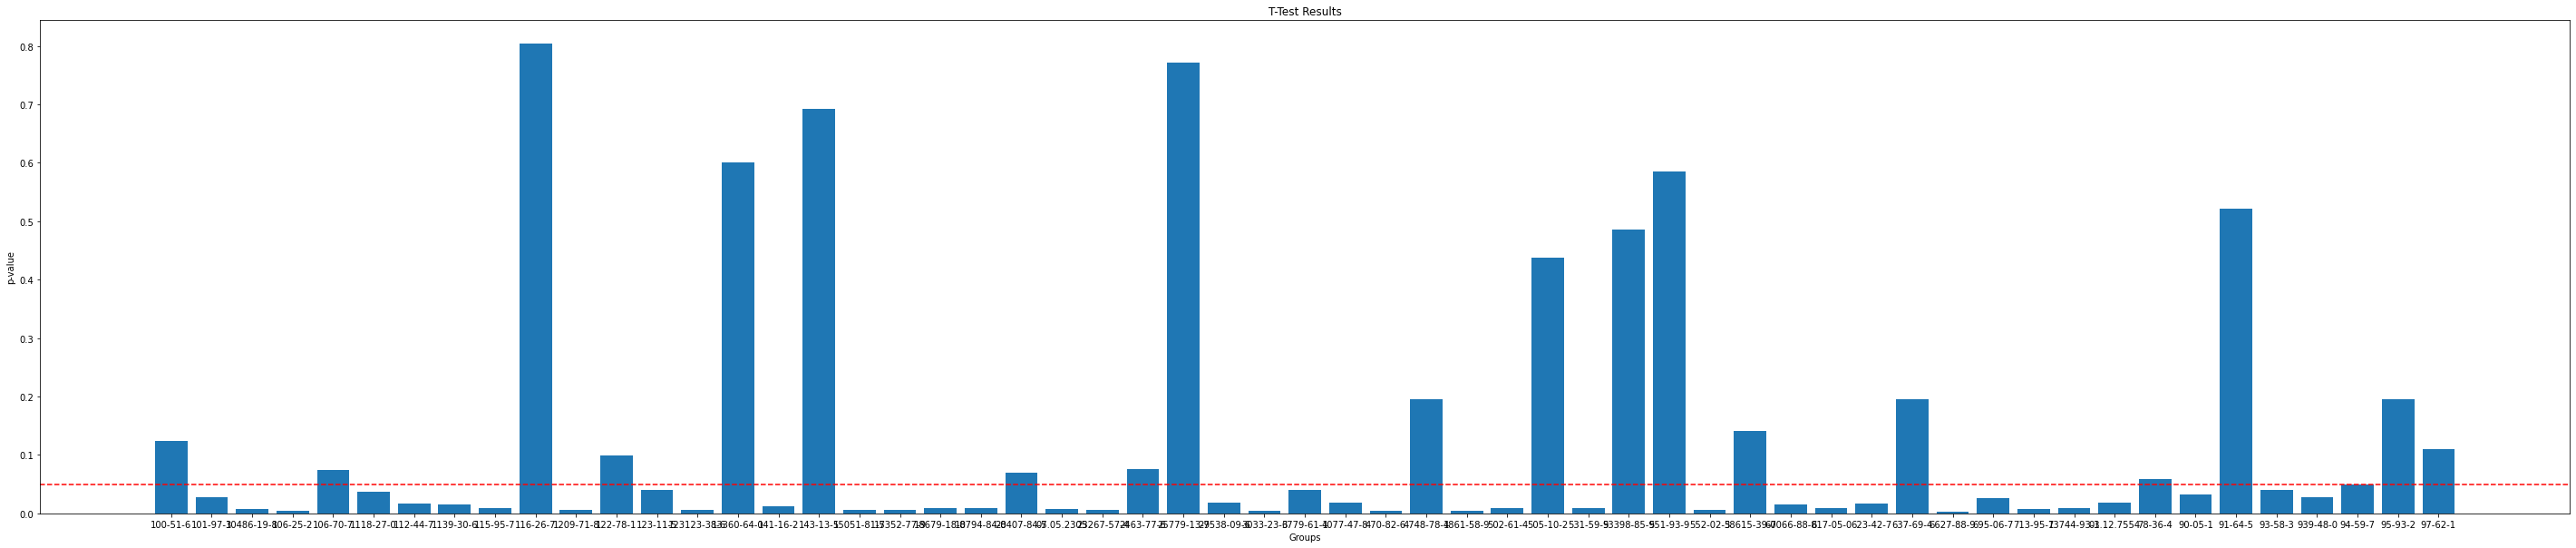

In [167]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
plt.bar(labels, p_values)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results')
plt.show()
